<a href="https://colab.research.google.com/github/Akshay091203/MINIPROJECT/blob/main/MarketBasketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Data visualisierung
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data Analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules



In [ ]:
data_raw = pd.read_csv('/content/Assignment-1_Data.csv', sep=';')
data_raw.head()
half_rows = len(data_raw) // 2
data_half = data_raw.iloc[:half_rows]

# Display the first few rows of the reduced dataset
print(data_half.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   BillNo                             Itemname  Quantity              Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  01.12.2010 08:26   
1  536365                  WHITE METAL LANTERN         6  01.12.2010 08:26   
2  536365       CREAM CUPID HEARTS COAT HANGER         8  01.12.2010 08:26   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  01.12.2010 08:26   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6  01.12.2010 08:26   

  Price  CustomerID         Country  
0  2,55     17850.0  United Kingdom  
1  3,39     17850.0  United Kingdom  
2  2,75     17850.0  United Kingdom  
3  3,39     17850.0  United Kingdom  
4  3,39     17850.0  United Kingdom  


In [ ]:
#Summarizing Data
print(data_half.shape)
print(data_half.info())


(106729, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106729 entries, 0 to 106728
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      106729 non-null  int64  
 1   Itemname    106404 non-null  object 
 2   Quantity    106729 non-null  int64  
 3   Date        106729 non-null  object 
 4   Price       106729 non-null  object 
 5   CustomerID  69831 non-null   float64
 6   Country     106729 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.7+ MB
None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Converting Date Column
data_half['Date'] = pd.to_datetime(data_half['Date'], format='%d.%m.%Y %H:%M')
data_half['YearMonth'] = data_half['Date'].dt.to_period('M')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-4-e80a90f7123d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_half['Date'] = pd.to_datetime(data_half['Date'], format='%d.%m.%Y %H:%M')
<ipython-input-4-e80a90f7123d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
# We notice that 'Price' column has commas in the numeric values, let's replace them and convert it to float
data_half['Price'] = data_half['Price'].str.replace(',', '.').astype(float)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-5-d04c66b932ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_half['Price'] = data_half['Price'].str.replace(',', '.').astype(float)


In [ ]:
# We check for missing values in the dataset across all columns.
missing_values = data_half.isnull().sum()
print(missing_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BillNo            0
Itemname        325
Quantity          0
Date              0
Price             0
CustomerID    36898
Country           0
YearMonth         0
dtype: int64


In [ ]:
# Descriptive Statistics
data_half.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Quantity,Price,CustomerID
count,106729.000000,106729.000000,106729.000000,69831.000000
mean,540948.978459,9.841917,4.205493,15374.729289
std,2680.564050,231.746811,44.404655,1759.984735
min,536365.000000,-2600.000000,0.000000,12346.000000
25%,538533.000000,1.000000,1.250000,13931.000000
50%,540977.000000,3.000000,2.460000,15321.000000
75%,543201.000000,9.000000,4.210000,17022.000000
max,545687.000000,74215.000000,13541.330000,18283.000000


### Data Filtering and Cleaning
A crucial aspect of data analysis is ensuring the data's integrity by filtering out irrelevant or erroneous entries and handling missing values appropriately. In this chapter, we focus on filtering out non-positive values, removing rows with missing item names, filling in missing customer IDs, and calculating total prices per transaction. These steps are vital to ensure the accuracy and reliability of our subsequent analysis.

In [ ]:
# Filtering the dataset to include only rows with values > 0
data = data_half[(data_half['Quantity']>0) & (data_half['Price']>0)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filtering the dataset to include only rows with values > 0
data = data_half[(data_half['Quantity']>0) & (data_half['Price']>0)]
# Dropping rows without item
data = data[data['Itemname'].notnull()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filling missing customer IDs
data = data.fillna('#NV')
# Calculate total price per pos / transaction
data['TotalPrice'] = data['Quantity'] * data['Price']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,YearMonth,TotalPrice
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


### Explorative Data Analysis (EDA)
In this section, we delve into exploring our dataset to gain insights and identify patterns. We begin by examining the structure of our data using the .info() method, which provides a summary of the data types and non-null counts for each column.

In [ ]:
print(data.info())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 106166 entries, 0 to 106728
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      106166 non-null  int64         
 1   Itemname    106166 non-null  object        
 2   Quantity    106166 non-null  int64         
 3   Date        106166 non-null  datetime64[ns]
 4   Price       106166 non-null  float64       
 5   CustomerID  106166 non-null  object        
 6   Country     106166 non-null  object        
 7   YearMonth   106166 non-null  period[M]     
 8   TotalPrice  106166 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3), period[M](1)
memory usage: 8.1+ MB
None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


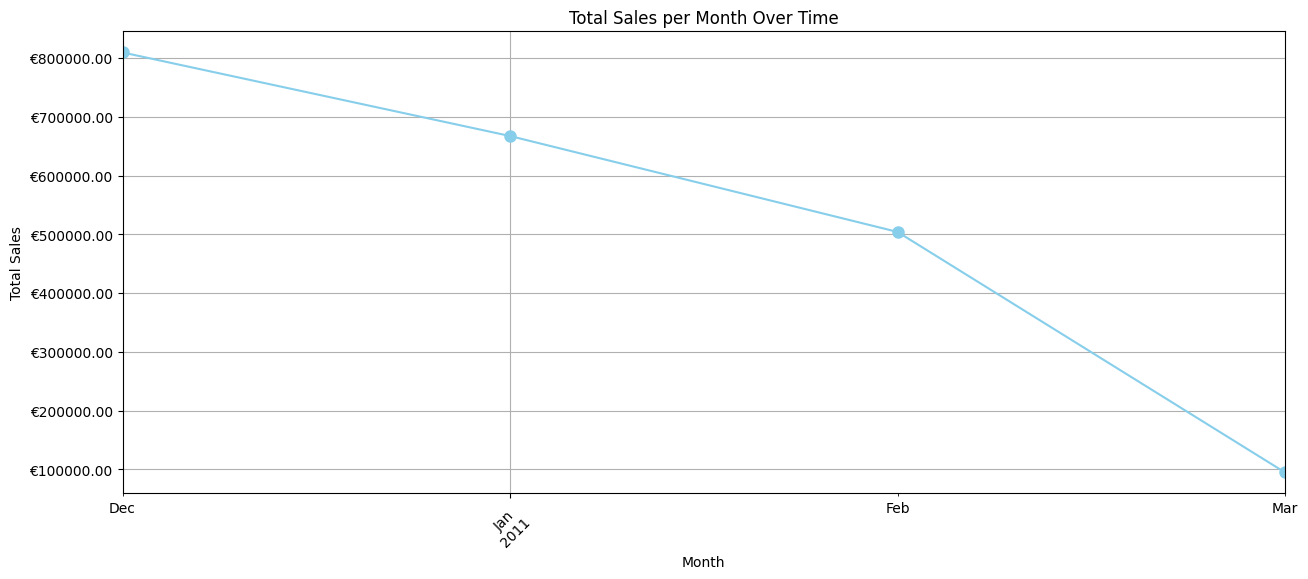

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Grouping the data by month and year, and calculating the total sum of sales
monthly_sales = data.groupby('YearMonth')['TotalPrice'].sum()

plt.figure(figsize=(15,6))
monthly_sales.plot(kind='line', marker='o', color='skyblue', markersize=8)  # Adjust marker size and color
plt.title('Total Sales per Month Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')

formatter = ticker.FormatStrFormatter('€%.2f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


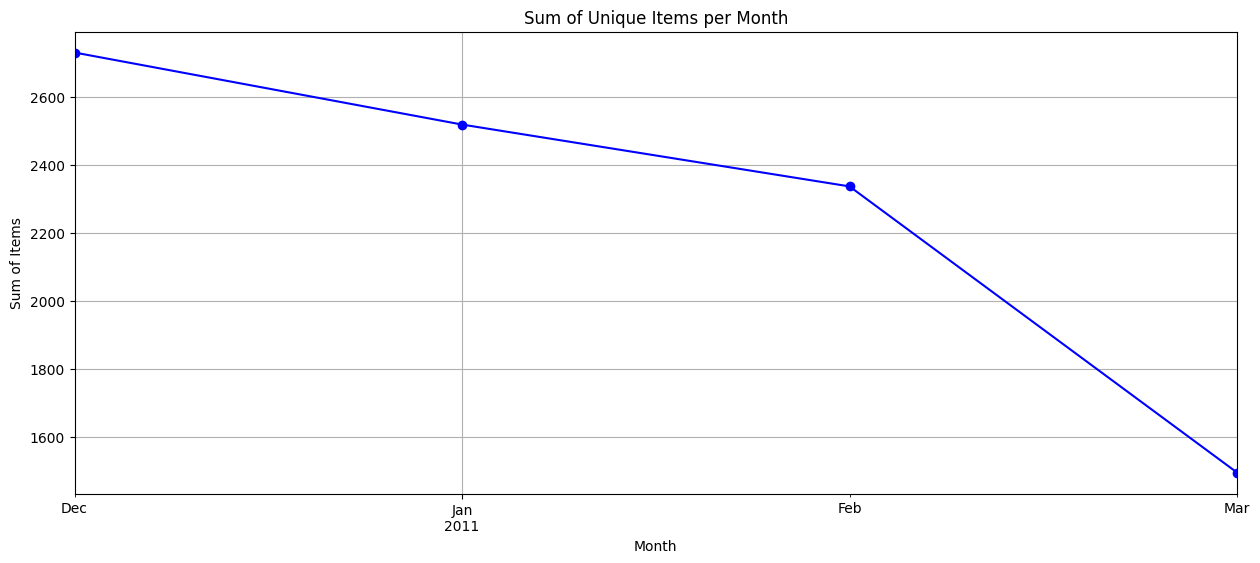

In [ ]:
# Grouping the data by month and year, and calculating the unique items per month
monthly_item = data.groupby('YearMonth')['Itemname'].nunique()
plt.figure(figsize=(15,6))
monthly_item.plot(kind='line', marker='o', color='b')
plt.title('Sum of Unique Items per Month')
plt.xlabel('Month')
plt.ylabel('Sum of Items')
plt.grid(True)
plt.show()

In [ ]:
# Preprocessing the data
data_processed = data[['BillNo', 'Itemname']]

# Convert 'BillNo' to a more memory-efficient data type
data_processed['BillNo'] = data_processed['BillNo'].astype('category')

# One-hot encoding
data_encoded = pd.get_dummies(data_processed, columns=['Itemname'])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-e9152d2e74b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_processed['BillNo'] = data_processed['BillNo'].astype('category')


In [ ]:

# Grouping by 'BillNo' and summing up
basket = data_encoded.groupby('BillNo').sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Binary transformation
basket[basket > 0] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Generating Frequent Itemsets Using the Apriori algorithm, we aim to extract frequent itemsets – combinations of items that frequently co-occur in transactions. These itemsets provide valuable insights into customer purchasing behaviors, revealing commonly associated products.

In [ ]:
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Confidence

In [ ]:
# Confidence represents the likelihood that the consequent item (item bought after) is purchased given the antecedent item(s) (item bought before).
# A confidence of 0.6 implies that the consequent item is purchased in 60% of transactions where the antecedent item(s) are also present, indicating a strong positive relationship.
rules_confidenz = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
print(rules_confidenz.shape)
rules_c = rules_confidenz.round(3)
rules_c.head()

(2, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Itemname_JAM JAR WITH GREEN LID),(Itemname_JAM JAR WITH PINK LID),0.025,0.029,0.021,0.825,28.200,0.020,5.539,0.989
1,"(Itemname_ROSES REGENCY TEACUP AND SAUCER, Ite...",(Itemname_GREEN REGENCY TEACUP AND SAUCER),0.027,0.057,0.023,0.822,14.506,0.021,5.312,0.957


### Lift Analysis

In [ ]:
# Lift measures how much more likely the consequent item(s) are purchased when the antecedent item(s) are present compared to when they are not.
# A lift value of 1.0 indicates that the items in the consequent are bought together as often as would be expected by chance.
rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold= 2.5)
print(rules_lift.shape)
rules_l = rules_lift.round(3)
rules_l.head()

(234, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Itemname_REGENCY CAKESTAND 3 TIER),(Itemname_6 RIBBONS RUSTIC CHARM),0.117,0.054,0.021,0.178,3.273,0.014,1.150,0.786
1,(Itemname_6 RIBBONS RUSTIC CHARM),(Itemname_REGENCY CAKESTAND 3 TIER),0.054,0.117,0.021,0.382,3.273,0.014,1.429,0.734
2,(Itemname_PACK OF 72 RETROSPOT CAKE CASES),(Itemname_60 TEATIME FAIRY CAKE CASES),0.074,0.046,0.027,0.367,8.032,0.024,1.507,0.946
3,(Itemname_60 TEATIME FAIRY CAKE CASES),(Itemname_PACK OF 72 RETROSPOT CAKE CASES),0.046,0.074,0.027,0.596,8.032,0.024,2.289,0.917
4,(Itemname_PACK OF 72 RETROSPOT CAKE CASES),(Itemname_72 SWEETHEART FAIRY CAKE CASES),0.074,0.048,0.021,0.277,5.740,0.017,1.316,0.892


### Support Analysis

In [ ]:
# Support quantifies the frequency with which a rule occurs in the dataset.
# A support of 0.05 means that the rule occurs in at least 5% of transactions, signifying its significance in the dataset.
rules_support = association_rules(frequent_itemsets, metric="support", min_threshold=0.03)
print(rules_support.shape)
rules_s = rules_support.round(3)
rules_s.head()

(32, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Itemname_ALARM CLOCK BAKELIKE GREEN),(Itemname_ALARM CLOCK BAKELIKE RED),0.057,0.055,0.038,0.661,12.035,0.035,2.786,0.973
1,(Itemname_ALARM CLOCK BAKELIKE RED),(Itemname_ALARM CLOCK BAKELIKE GREEN),0.055,0.057,0.038,0.692,12.035,0.035,3.056,0.970
2,(Itemname_GREEN REGENCY TEACUP AND SAUCER),(Itemname_REGENCY CAKESTAND 3 TIER),0.057,0.117,0.031,0.538,4.613,0.024,1.914,0.830
3,(Itemname_REGENCY CAKESTAND 3 TIER),(Itemname_GREEN REGENCY TEACUP AND SAUCER),0.117,0.057,0.031,0.262,4.613,0.024,1.277,0.887
4,(Itemname_GREEN REGENCY TEACUP AND SAUCER),(Itemname_ROSES REGENCY TEACUP AND SAUCER),0.057,0.057,0.042,0.733,12.929,0.038,3.533,0.978


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

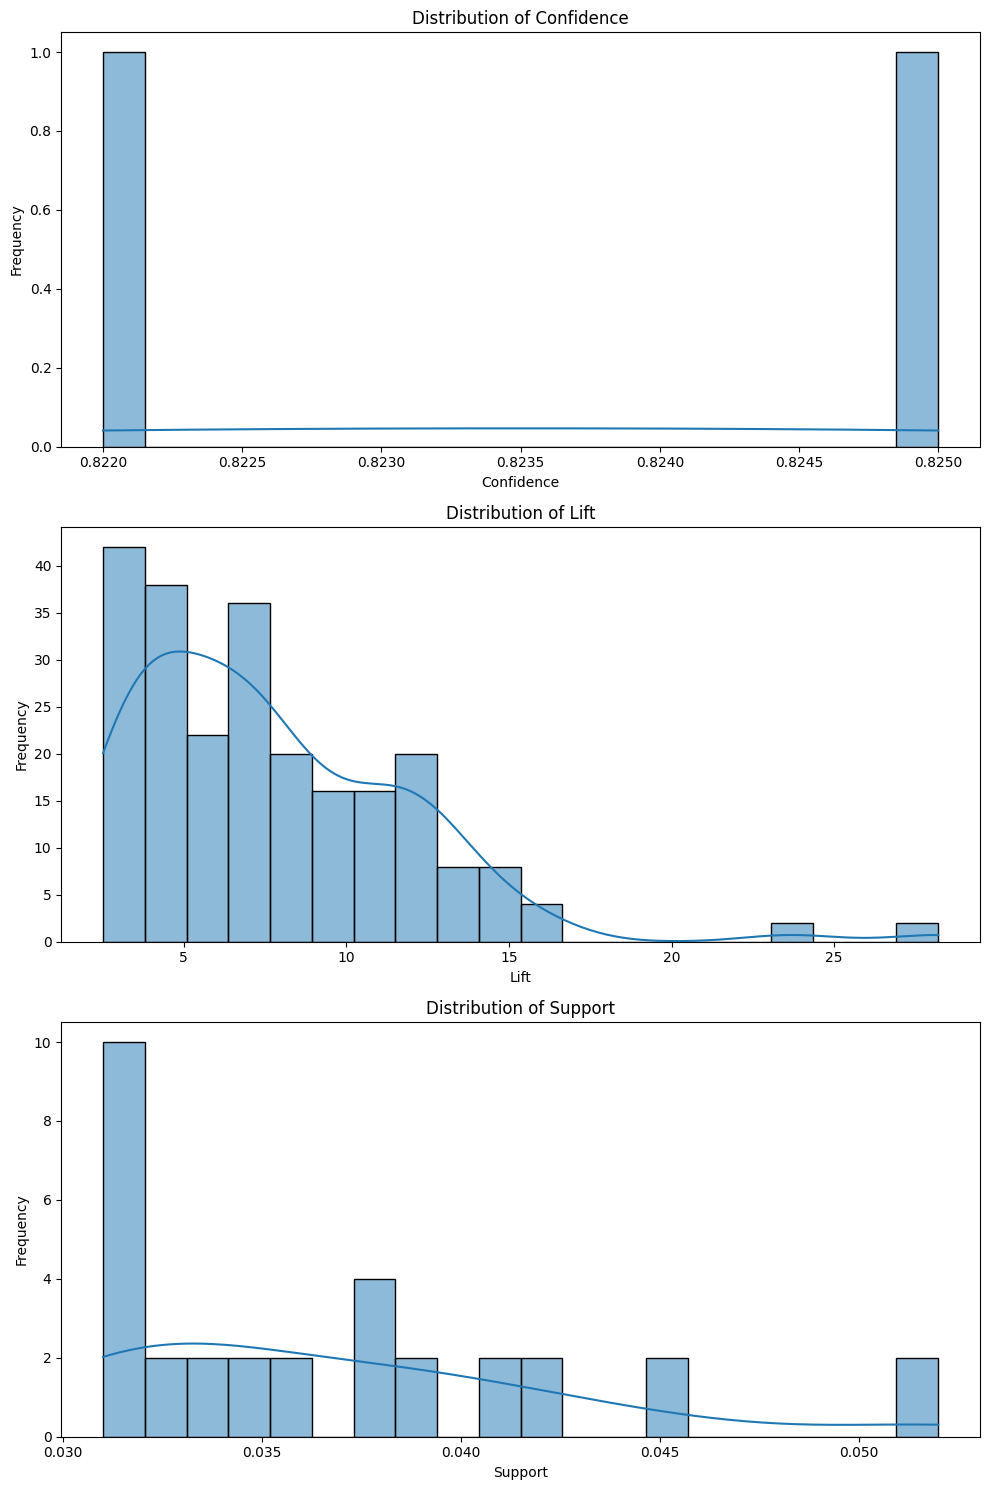

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# The histogram below illustrates the distribution of Confidence values among the association rules.
sns.histplot(rules_c['confidence'], bins=20, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Confidence')
axes[0].set_xlabel('Confidence')
axes[0].set_ylabel('Frequency')

# The histogram below illustrates the distribution of Lift values among the association rules.
sns.histplot(rules_l['lift'], bins=20, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Lift')
axes[1].set_xlabel('Lift')
axes[1].set_ylabel('Frequency')

# The histogram below illustrates the distribution of Support values among the association rules.
sns.histplot(rules_s['support'], bins=20, ax=axes[2], kde=True)
axes[2].set_title('Distribution of Support')
axes[2].set_xlabel('Support')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import random
import csv

# Define food items
food_items = ["Water", "Bread", "Butter", "Milk", "Eggs", "Fruits", "Vegetables", "Meat", "Cheese"]

def generate_store(store_id):
  """
  Generates a dictionary representing a store with a random name and food items.
  """
  store_name = f"Store {store_id}"
  items = []

  # Select additional random food items (excluding Water)
  num_additional_items = random.randint(1, 2)  # Maintain 2-3 items per store
  items.extend(random.sample(food_items[:-1], num_additional_items))  # Exclude Water from random selection

  return {
    "store_id": store_id,
    "store_name": store_name,
    "items": items
  }

# Generate 1000 stores
stores = []
for i in range(1, 1001):
  stores.append(generate_store(i))

# Write data to CSV file
with open("store_data_food.csv", "w", newline="") as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(["Store ID", "Store Name", "Items"])  # Write headers
  for store in stores:
    writer.writerow([store["store_id"], store["store_name"], ", ".join(store["items"])])

print(f"Generated dataset with {len(stores)} stores selling food items. Saved to store_data_food.csv!")


Generated dataset with 1000 stores selling food items. Saved to store_data_food.csv!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

# Replace 'store_data.csv' with your actual file path
data = pd.read_csv("store_data_food.csv")
data.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Store ID,Store Name,Items
0,1,Store 1,"Eggs, Bread"
1,2,Store 2,"Meat, Eggs"
2,3,Store 3,Butter
3,4,Store 4,Water
4,5,Store 5,Vegetables
5,6,Store 6,"Vegetables, Eggs"
6,7,Store 7,Eggs
7,8,Store 8,"Butter, Vegetables"
8,9,Store 9,Butter
9,10,Store 10,"Meat, Vegetables"


In [ ]:
import pandas as pd


def calculate_support(itemset, transactions):
  """
  Calculates the support of an itemset within a set of transactions.
  """
  count = sum(1 for transaction in transactions if itemset.issubset(transaction))
  return count / len(transactions)


def calculate_confidence(item_A, item_B, transactions):
  """
  Calculates the confidence of a rule (item_A -> item_B) based on transactions.
  """
  support_A = calculate_support({item_A}, transactions)
  support_AB = calculate_support({item_A, item_B}, transactions)

  confidence = support_AB / support_A if support_A > 0 else 0
  return confidence


def predict_association(data_path):
  """
  Calculates support and confidence for user-specified items (item_A and item_B).
  """
  # Load data from CSV file
  try:
    df = pd.read_csv("/content/store_data_food.csv")
  except FileNotFoundError:
    print(f"Error: File '{data_path}' not found.")
    return

  transactions = df["Items"].str.split(", ").tolist()
  unique_items = set(item for transaction in transactions for item in transaction)

  item_A_input = input("Enter first item: ")
  item_B_input = input("Enter second item: ")

  if item_A_input not in unique_items or item_B_input not in unique_items:
    print(f"Items '{item_A_input}' and '{item_B_input}' not found in data.")
    return

  support = calculate_support({item_A_input, item_B_input}, transactions)
  confidence = calculate_confidence(item_A_input, item_B_input, transactions)

  print(f"Support for buying '{item_B_input}' given '{item_A_input}': {support:.2f}")
  print(f"Confidence for buying '{item_B_input}' given '{item_A_input}': {confidence:.2f}")


# Run the prediction (replace 'your_data.csv' with your actual file path)
predict_association("your_data.csv")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter first item: Water
Enter second item: Butter
Support for buying 'Butter' given 'Water': 0.02
Confidence for buying 'Butter' given 'Water': 0.09
